In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the data

df = pd.read_csv("/home/inventor/Datasets/California House Price/Cal_house/housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [8]:
# Null Values 

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Handle the Null Values

df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

In [14]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

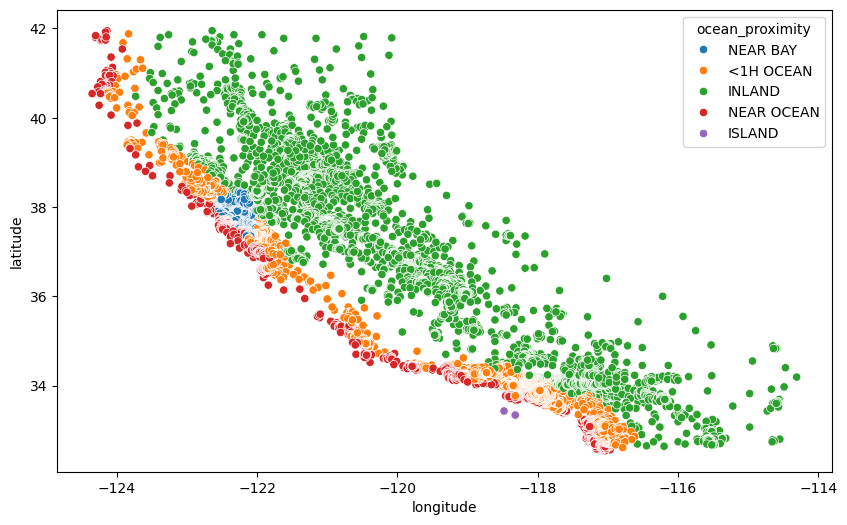

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["ocean_proximity"])

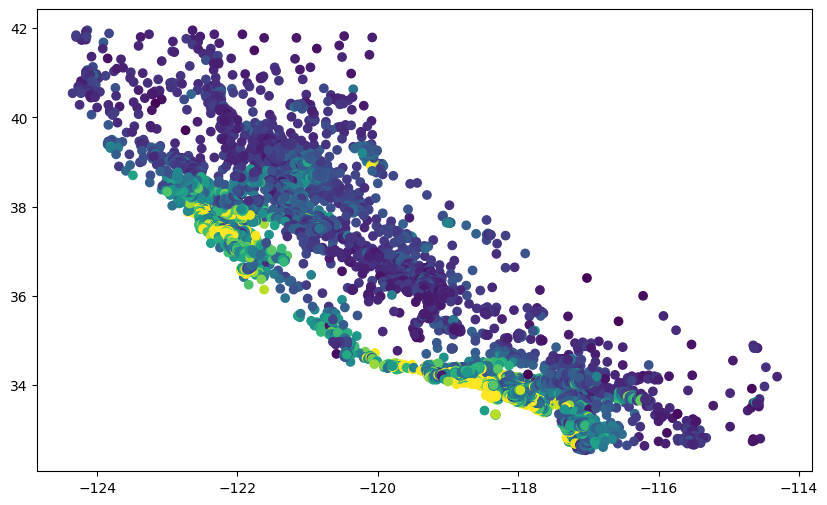

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df["longitude"], df["latitude"], c=df["median_house_value"])
plt.show()

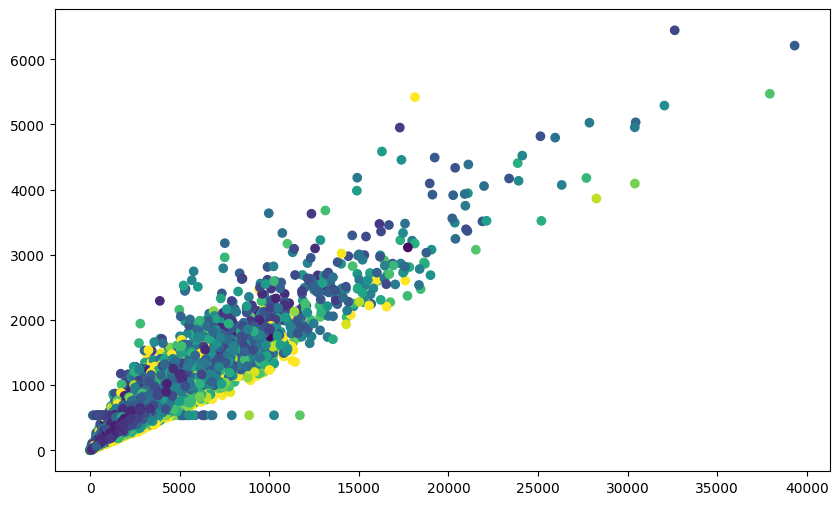

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df["total_rooms"], df["total_bedrooms"], c=df["median_house_value"])
plt.show()

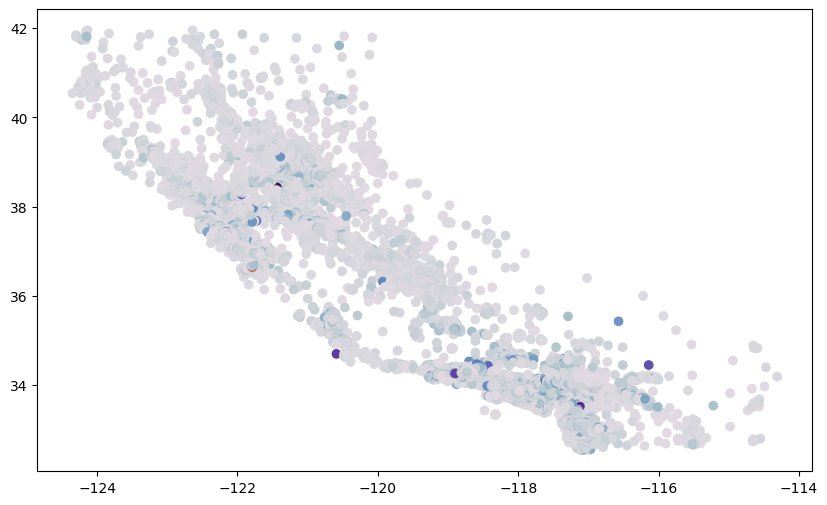

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df["longitude"], df["latitude"], c=df["population"], cmap="twilight")
plt.show()

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
# Change the Datatype
df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["households"] = df["households"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")

In [26]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtype not in ["int64", "float64"]]

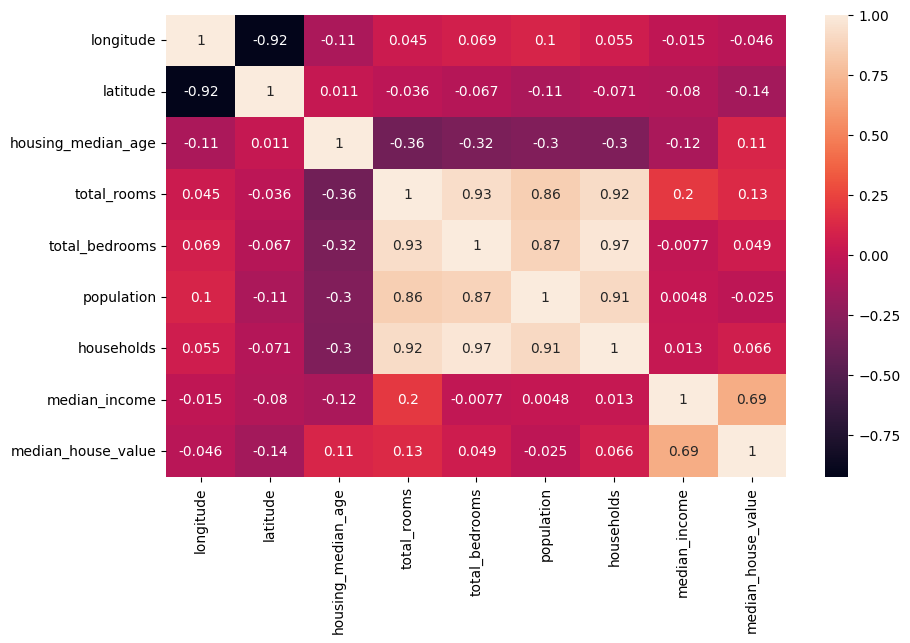

In [29]:
# Correlation Matrix

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [30]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [40]:
# Encode Categorical Columns 

one_hot = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore", dtype=np.int64)

encoded = one_hot.fit_transform(df[cat_cols])

print(encoded)

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY,0,0,1,0


In [55]:
# Drop the OCEAN PROXIMITY
encoded_df.drop("ocean_proximity", axis=1, inplace=True)

In [56]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0,0,1,0


In [68]:
# Apply Principal Component Analysis

class PCA_custom():

    def __init__(self, n_components):

        self.n_components = n_components
        self.variance = None
        self.components = None
        self.explained_variane_ratio = None
    
    def fit(self, X):

        # Center the data
        X_centered = X - X.mean()

        # Calculate the Covariance Matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Find the Eigen Values, Eigen Vector

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort the Eigen Values and EigenVectors

        sort_indicies = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[sort_indicies]
        eigenvectors = eigenvectors[:, sort_indicies]

        # Top comopnent Analysis

        self.variance = eigenvalues[:self.n_components]
        self.components = eigenvectors[:, :self.n_components]

        # Explained Variance Ratio

        total_variance = np.sum(self.variance)

        self.explained_variane_ratio = eigenvalues / total_variance
    
    def transform(self, X):

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)

    def fit_transform(self, X):

        self.fit(X)

        return self.transform(X)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("median_house_value", axis=1), encoded_df["median_house_value"],
                                                    test_size=0.2, random_state=42)

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 12), (16512,), (4128, 12), (4128,))

In [71]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.267645,-1.367976,0.346478,0.224718,0.212610,0.772251,0.322924,-0.321654,0,0,0,1
8267,0.703627,-0.871699,1.617807,0.342065,0.594238,-0.098440,0.670799,-0.030620,0,0,0,1
17445,-0.454356,-0.455012,-1.957806,-0.338639,-0.493402,-0.450778,-0.427755,0.150349,0,0,0,1
14265,1.227714,-1.377340,0.584852,-0.556832,-0.407535,-0.006602,-0.378059,-1.014947,0,0,0,1
2271,-0.114948,0.537543,1.141059,-0.116322,-0.254884,-0.486983,-0.312669,-0.166583,1,0,0,0


In [78]:
pca_custom = PCA_custom(n_components=4)

In [79]:
X_train = pca_custom.fit_transform(X_train)

X_test = pca_custom.transform(X_test)

In [80]:
X_train.shape, X_test.shape

((16512, 4), (4128, 4))

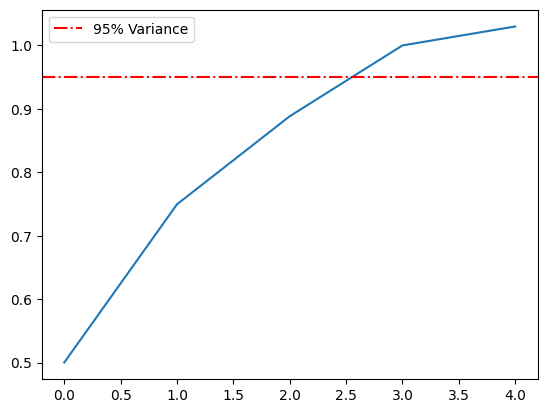

In [81]:
cum_sum = np.cumsum(pca_custom.explained_variane_ratio)

threshold = 0.95
plt.plot(cum_sum)
plt.axhline(y=threshold, color="r", linestyle="-.", label="95% Variance")
plt.legend()
plt.show()

### **Algorithms to Apply**

    - Multiple Linear Regression
    - Schostic Gradient Descent
    - Ridge Regression
    - Lasso Regression 
    - ElasticNET Regression
    

## 1. Multiple Linear Regression

In [82]:
class MultipleLinear_Regression():

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

        print(f"Coef_: {self.coef_} | Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [83]:
mlr = MultipleLinear_Regression()

In [84]:
mlr.fit(X_train,y_train)

y_pred_mlr = mlr.predict(X_test)

Coef_: [-0.03099117 -0.04682191 -0.55935609  0.50110345] | Intercept_: 0.0029367236868468875


In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

r2_score_mlr =  r2_score(y_test, y_pred_mlr)

mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

rmse_mlr = root_mean_squared_error(y_test, y_pred_mlr)

print(f"R2 Score Muliple Linear Regression: {r2_score_mlr}")
print(f"MAE Multiple Linear Regression: {mae_mlr}")
print(f"RMSE Multiple Linear Regression: {rmse_mlr}")

R2 Score Muliple Linear Regression: 0.5443702444996277
MAE Multiple Linear Regression: 0.496022182342221
RMSE Multiple Linear Regression: 0.6696234912219435


In [90]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## 2. Schostic Gradient Descent

In [110]:
class Schostic_Gradient_Descent():

    def __init__(self, learning_rate, epochs):
        
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            for i in range(X_train.shape[0]):

                idx = np.random.randint(X_train.shape[0])

                y_hat = np.dot(X_train[idx], self.coef_)

                error = y_train[idx] - y_hat

                coef_slope = np.dot(error, X_train[idx])

                self.coef_ = self.coef_ + (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")

    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred 

In [111]:
sgd = Schostic_Gradient_Descent(learning_rate=0.0001, epochs=100)

In [112]:
sgd.fit(X_train, y_train)


Coef_: [-0.00156824 -0.03128292 -0.04310682 -0.55450464  0.50181634]


In [113]:
y_pred_sgd = sgd.predict(X_test)

In [114]:
r2_score_sgd = r2_score(y_test, y_pred_sgd)

mae_sgd = mean_absolute_error(y_test, y_pred_sgd)

rmse_sgd = root_mean_squared_error(y_test, y_pred_sgd)

print(f"R2 Score SGD: {r2_score_sgd}")
print(f"MAE SGD: {mae_sgd}")
print(f"RMSE SGD: {rmse_sgd}")

R2 Score SGD: 0.5446244146819006
MAE SGD: 0.49529128564308045
RMSE SGD: 0.6694366925488969


## 3. Ridge Regression

In [127]:
class Ridge_Custom():

    def __init__(self, alpha):

        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        I = np.identity(X_train.shape[1])

        betas = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

        print(f"Coef_: {self.coef_} | Intercept_: {self.intercept_}")
    
    def predict(self,X_test):


        y_pred = np.dot(X_test, self.coef_) + self.intercept_

        return y_pred
    

        

In [128]:
ridge = Ridge_Custom(alpha=0.01)

In [129]:
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)


Coef_: [-0.03099117 -0.04682189 -0.55935578  0.5011031 ] | Intercept_: 0.0029367219083089213


In [130]:
y_test.shape

(4128,)

In [131]:
y_pred_ridge.shape

(4128,)

In [132]:
r2_score_ridge = r2_score(y_test, y_pred_ridge)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)

print(f"R2 Score Ridge: {r2_score_ridge}")
print(f"MAE Ridge: {mae_ridge}")
print(f"RMSE Ridge: {rmse_ridge}")

R2 Score Ridge: 0.5443702593717576
MAE Ridge: 0.4960221984771796
RMSE Ridge: 0.6696234802934127


## 4. Lasso Regression

In [183]:
class Laso_Regression():


    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.dot(self.l1_ratio, np.sign(self.coef_)) + np.dot((1 - self.l1_ratio), self.coef_))) 

            self.coef_ = self.coef_ - (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)

        return y_pred


In [193]:
lasso = Laso_Regression(learning_rate=0.00001, epochs=1000, alpha=0.01, l1_ratio=1)

In [194]:
lasso.fit(X_train, y_train)

Coef_: [ 0.00293612 -0.03099102 -0.0468216  -0.55935553  0.50110275]


In [195]:
y_pred_lasso = lasso.predict(X_test)

In [196]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)

print(f"R2 Score: {r2_score_lasso}")
print(f"MAE Lasso: {mae_lasso}")
print(f"RMSE Lasso: {rmse_lasso}")

R2 Score: 0.5443702926297961
MAE Lasso: 0.49602208372228435
RMSE Lasso: 0.6696234558543103


## 5. ElasticNET Lasso Regression

In [222]:
class ElasticNET_Regression():

    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train)  + np.dot(self.alpha, (np.dot(self.l1_ratio, np.sign(self.coef_)) + np.dot((1 - self.l1_ratio), self.coef_)))

            self.coef_ = self.coef_ - (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)
        return y_pred

In [227]:
elastic = ElasticNET_Regression(learning_rate=0.00001, epochs=1000, alpha=0.01, l1_ratio=0.5)

In [228]:
elastic.fit(X_train, y_train)

Coef_: [ 0.00293642 -0.03099109 -0.04682174 -0.55935565  0.50110292]


In [229]:
y_pred_elastic = elastic.predict(X_test)

In [230]:
r2_score_elastic = r2_score(y_test, y_pred_elastic)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)

print(f"R2 Score Elastic: {r2_score_elastic}")
print(f"MAE Elastic: {mae_elastic}")
print(f"RMSE Elastic: {rmse_elastic}")

R2 Score Elastic: 0.5443702760009761
MAE Elastic: 0.4960221410997483
RMSE Elastic: 0.6696234680737152


In [233]:
score = {"R2 Score" : [r2_score_mlr, r2_score_sgd, r2_score_ridge, r2_score_lasso, r2_score_elastic], 
         "MAE" : [mae_mlr, mae_sgd, mae_ridge, mae_lasso, mae_elastic],
         "RMSE": [rmse_mlr, rmse_sgd, rmse_ridge, rmse_lasso, rmse_elastic]}

score_df = pd.DataFrame(data=score, index=["MLR", "SGD", "Ridge", "Lasso", "Elastic"])

score_df

,R2 Score,MAE,RMSE
MLR,0.544370,0.496022,0.669623
SGD,0.544624,0.495291,0.669437
Ridge,0.544370,0.496022,0.669623
Lasso,0.544370,0.496022,0.669623
Elastic,0.544370,0.496022,0.669623


Text(0.5, 1.0, 'R2 Score')

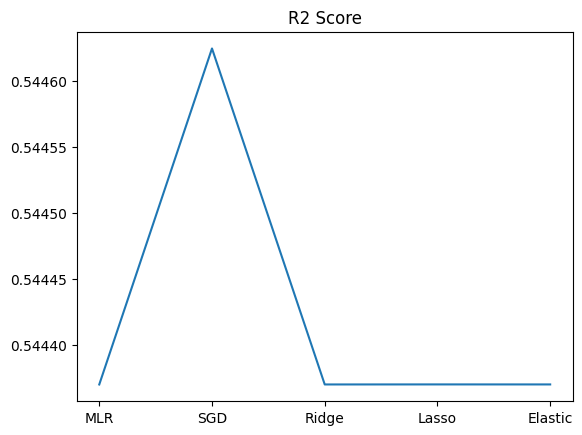

In [236]:
plt.plot(score_df["R2 Score"])
plt.title("R2 Score")

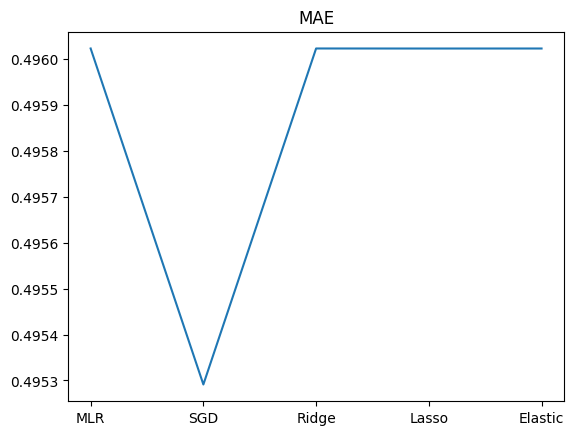

In [237]:
plt.plot(score_df["MAE"])
plt.title("MAE")
plt.show()

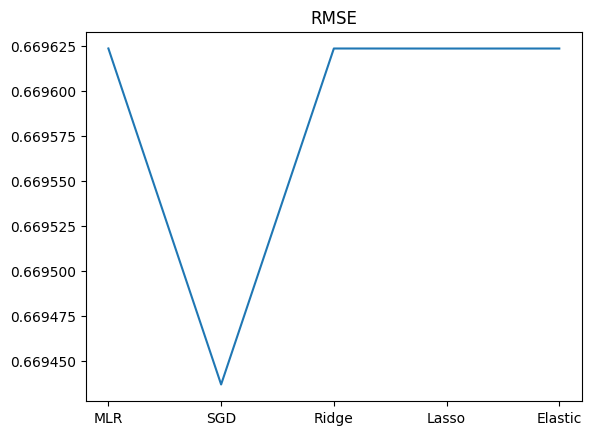

In [240]:
plt.plot(score_df["RMSE"])
plt.title("RMSE")
plt.show()

In [242]:
print(f"R2 MLR: {r2_score_mlr} | R2 SGD: {r2_score_sgd} | R2 Ridge: {r2_score_ridge} | R2 Lasso: {r2_score_lasso} | R2 Elastic: {r2_score_elastic}")
print(f"MAE MLR: {mae_mlr} | MAE SGD: {mae_sgd} | MAE Ridge: {mae_ridge} | MAE Lasso: {mae_lasso} | MAE Elastic: {mae_elastic}")
print(f"RMSE MLR: {rmse_mlr} | RMSE SGD: {rmse_sgd} | RMSE Ridge: {rmse_ridge} | RMSE Lasso: {rmse_lasso} | RMSE Elastic: {rmse_elastic}")

R2 MLR: 0.5443702444996277 | R2 SGD: 0.5446244146819006 | R2 Ridge: 0.5443702593717576 | R2 Lasso: 0.5443702926297961 | R2 Elastic: 0.5443702760009761
MAE MLR: 0.496022182342221 | MAE SGD: 0.49529128564308045 | MAE Ridge: 0.4960221984771796 | MAE Lasso: 0.49602208372228435 | MAE Elastic: 0.4960221410997483
RMSE MLR: 0.6696234912219435 | RMSE SGD: 0.6694366925488969 | RMSE Ridge: 0.6696234802934127 | RMSE Lasso: 0.6696234558543103 | RMSE Elastic: 0.6696234680737152
